In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
data_1 = pd.read_stata('ps2q1.dta')
data_1 = data_1.sort_values(by=['tot_exp'])

In [237]:
data_1.shape

(100, 7)

In [288]:
data_1['tot_exp'].mean()

2873.010009765625

In [147]:
data_1.describe()

,tot_exp,food_exp,hous_exp,n_adult,n_child,hhsize,pce
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2873.01001,1267.729980,167.000000,3.480000,2.020000,5.500000,637.224609
std,2195.00708,662.651428,385.580353,1.888187,1.792127,2.743219,618.046692
min,317.00000,188.000000,0.000000,1.000000,0.000000,1.000000,155.444443
25%,1542.25000,791.500000,0.000000,2.000000,1.000000,4.000000,306.875008
50%,2252.00000,1118.500000,12.500000,3.000000,2.000000,5.000000,470.712494
75%,3339.25000,1573.500000,200.000000,5.000000,3.000000,7.000000,691.750000
max,13613.00000,3656.000000,3000.000000,9.000000,7.000000,13.000000,4514.000000


In [3]:
data_1.head()

,tot_exp,food_exp,hous_exp,n_adult,n_child,hhsize,pce
0,1123.0,824.0,0.0,3.0,2.0,5.0,224.600006
1,12208.0,2455.0,3000.0,5.0,1.0,6.0,2034.666626
2,1194.0,645.0,0.0,3.0,2.0,5.0,238.800003
3,2755.0,1476.0,200.0,2.0,3.0,5.0,551.000000
4,2174.0,1350.0,280.0,3.0,1.0,4.0,543.500000


In [9]:
plt.figure(figsize=(12,10))
import seaborn as sns
corr = data_1.corr()
correlation_matrix = corr.style.background_gradient().set_precision(2)
correlation_matrix

,tot_exp,food_exp,hous_exp,n_adult,n_child,hhsize,pce
tot_exp,1,0.78,0.37,0.46,-0.021,0.3,0.51
food_exp,0.78,1,0.18,0.53,0.13,0.45,0.36
hous_exp,0.37,0.18,1,0.022,-0.09,-0.043,0.26
n_adult,0.46,0.53,0.022,1,0.11,0.76,-0.17
n_child,-0.021,0.13,-0.09,0.11,1,0.73,-0.4
hhsize,0.3,0.45,-0.043,0.76,0.73,1,-0.38
pce,0.51,0.36,0.26,-0.17,-0.4,-0.38,1


<Figure size 864x720 with 0 Axes>

In [270]:
# Getting estimates of regression food_exp = a0 + a1*tot_exp + ui

Y = data_1['food_exp']
X = data_1['tot_exp']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()

results.params

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               food_exp   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.07e-21
Time:                        20:20:50   Log-Likelihood:                -744.07
No. Observations:                 100   AIC:                             1492.
Df Residuals:                      98   BIC:                             1497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        590.9059     68.822      8.586      0.000     454.331     727.481
tot_exp        0.2356      0.019     12.353      0.000       0.198       0.273
==============================================================================
Omnibus:                       12.035   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.512
Skew:                           0.455   Prob(JB):                     2.13e-05
Kurtosis:                       5.082   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [276]:
sum((data_1['food_exp']-data_1['food_exp'].mean())**2)

43471575.526592255

Text(0.5,0,'Total Expenditure')

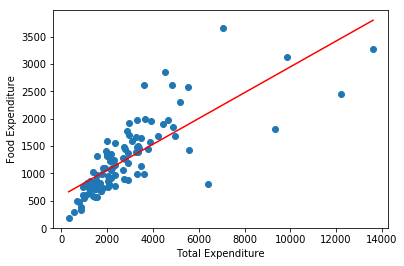

In [245]:
plt.scatter(data_1['tot_exp'],data_1['food_exp'])
plt.plot(X, X*0.235580 + 590.905901, 'r')
plt.ylabel('Food Expenditure')
plt.xlabel('Total Expenditure')

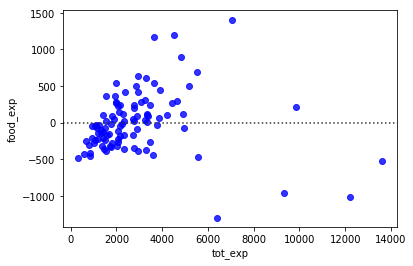

In [6]:
sns.residplot(data_1['tot_exp'], data_1['food_exp'], lowess=False, color="b")

Text(0.5,0,'Total Expenditure')

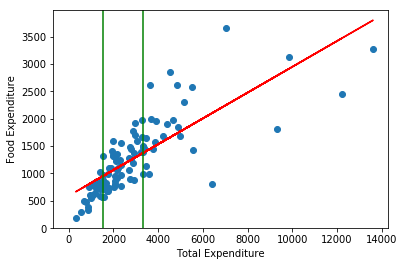

In [12]:
plt.scatter(data_1['tot_exp'],data_1['food_exp'])
plt.plot(X, X*0.235580 + 590.905901, 'r')
plt.axvline(1542.25, c='g')
plt.axvline(3339.25, c='g')

plt.ylabel('Food Expenditure')
plt.xlabel('Total Expenditure')

In [22]:
data_1['food_exp'].var()

439106.90625

In [295]:
np.corrcoef(data_1['n_child'],data_1['hhsize'])

array([[1.      , 0.729397],
       [0.729397, 1.      ]])

In [8]:
# 25th & 75th percentile food expenditure val

data_1.loc[(data_1['tot_exp']>1499.0) & (data_1['tot_exp']< 1551.0),'food_exp'].mean()
data_1.loc[(data_1['tot_exp']>3299.0) & (data_1['tot_exp']< 3351.0),'food_exp'].mean()

972.0

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


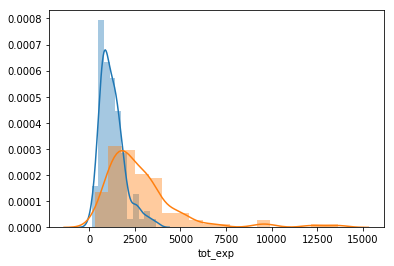

In [65]:
# without taking log

sns.distplot(data_1['food_exp'])
sns.distplot(data_1['tot_exp'])

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


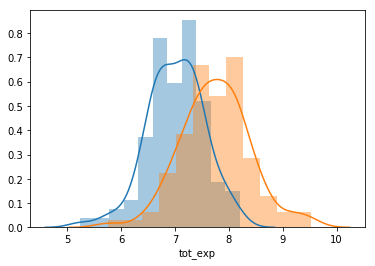

In [67]:
# Taking logarithm

sns.distplot(np.log(data_1['food_exp']))
sns.distplot(np.log(data_1['tot_exp']))

In [277]:
# Getting estimates of regression ln(food_exp) = b0 + b1*ln(tot_exp) + vi

Y = np.log(data_1['food_exp'])
X = np.log(data_1['tot_exp'])
X = sm.add_constant(X)


model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               food_exp   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     298.0
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.78e-31
Time:                        20:55:15   Log-Likelihood:                -7.7515
No. Observations:                 100   AIC:                             19.50
Df Residuals:                      98   BIC:                             24.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4830      0.322      4.613      0.000       0.845       2.121
tot_exp        0.7135      0.041     17.262      0.000       0.631       0.795
==============================================================================
Omnibus:                       11.359   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.137
Skew:                          -0.637   Prob(JB):                      0.00140
Kurtosis:                       4.236   Cond. No.                         96.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(4, 8.578206973031616)

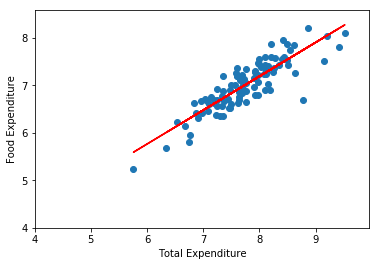

In [70]:
plt.scatter(np.log(data_1['tot_exp']),np.log(data_1['food_exp']))
plt.plot(X, X*0.713466 + 1.482987, 'r')
plt.ylabel('Food Expenditure')
plt.xlabel('Total Expenditure')
plt.xlim(xmin=4)
plt.ylim(ymin=4)

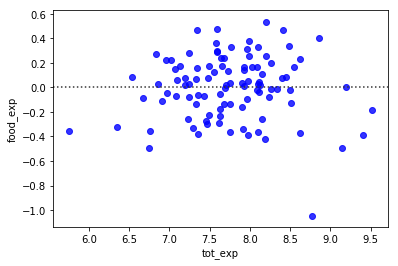

In [78]:
sns.residplot(np.log(data_1['tot_exp']), np.log(data_1['food_exp']), lowess=False, color="b")

In [243]:
data_1.head()

,tot_exp,food_exp,hous_exp,n_adult,n_child,hhsize,pce
37,317.0,188.0,0.0,1.0,0.0,1.0,317.000000
55,570.0,295.0,120.0,1.0,0.0,1.0,570.000000
63,687.0,505.0,0.0,2.0,0.0,2.0,343.500000
96,790.0,470.0,0.0,2.0,2.0,4.0,197.500000
62,854.0,331.0,0.0,1.0,2.0,3.0,284.666656


In [278]:
# I think I finally got this

X = np.array(data_1['tot_exp']).reshape(-1,1)
X_new = np.hstack([X,X**2])
Y = np.array(data_1['food_exp']).reshape(-1,1)
model = LinearRegression()
model.fit(X_new,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [279]:
model.coef_

array([[ 4.7415277e-01, -2.0926926e-05]], dtype=float32)

In [280]:
model.intercept_

array([178.03796], dtype=float32)

In [241]:
model.score(X_new,Y)

0.6940875809469393

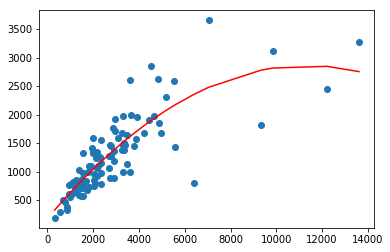

In [242]:
plt.scatter(X,Y)
plt.plot(X,model.predict(X_new),'r')

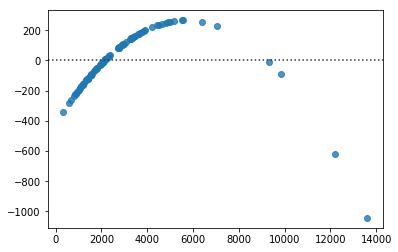

In [190]:
sns.residplot(X,model.predict(X_new))

In [289]:
X = np.array(data_1['tot_exp']).reshape(-1,1)
X_new = np.hstack([np.log(X),(np.log(X))**2])
Y = np.array(data_1['food_exp']).reshape(-1,1)
model = LinearRegression()
model.fit(X_new,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [290]:
model.coef_

array([[-1257.0994 ,   135.50452]], dtype=float32)

In [291]:
model.intercept_

array([2814.1812], dtype=float32)

In [292]:
model.score(X_new,Y)

0.6964384549141707

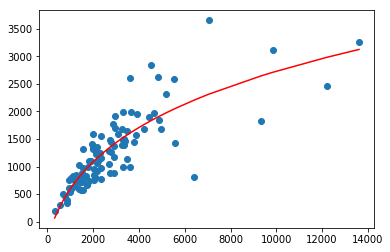

In [293]:
plt.scatter(X,Y)
plt.plot(X,model.predict(X_new),'r')

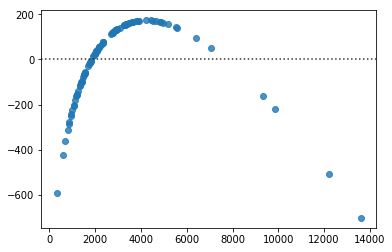

In [178]:
sns.residplot(X,model.predict(X_new))

In [217]:
data_1.head()

,tot_exp,food_exp,hous_exp,n_adult,n_child,hhsize,pce,log_tot
37,317.0,188.0,0.0,1.0,0.0,1.0,317.000000,5.758902
55,570.0,295.0,120.0,1.0,0.0,1.0,570.000000,6.345636
63,687.0,505.0,0.0,2.0,0.0,2.0,343.500000,6.532334
96,790.0,470.0,0.0,2.0,2.0,4.0,197.500000,6.672033
62,854.0,331.0,0.0,1.0,2.0,3.0,284.666656,6.749931


In [227]:
data_1['log_tot'] = np.log(data_1['tot_exp'])

In [228]:
X = data_1[['log_tot','n_adult','n_child']]
X = sm.add_constant(X)
y = np.log(data_1["food_exp"])
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [229]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               food_exp   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.54e-31
Time:                        16:12:06   Log-Likelihood:                -1.6418
No. Observations:                 100   AIC:                             11.28
Df Residuals:                      96   BIC:                             21.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8235      0.332      5.486      0.000       1.164       2.483
log_tot        0.6433      0.046     13.960      0.000       0.552       0.735
n_adult        0.0389      0.016      2.484      0.015       0.008       0.070
n_child        0.0335      0.014      2.356      0.020       0.005       0.062
==============================================================================
Omnibus:                        2.232   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.714
Skew:                          -0.158   Prob(JB):                        0.424
Kurtosis:                       3.558   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
X = data_1[['log_tot','hhsize','n_child']]
X = sm.add_constant(X)
y = np.log(data_1["food_exp"])
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               food_exp   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.54e-31
Time:                        16:12:08   Log-Likelihood:                -1.6418
No. Observations:                 100   AIC:                             11.28
Df Residuals:                      96   BIC:                             21.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8235      0.332      5.486      0.000       1.164       2.483
log_tot        0.6433      0.046     13.960      0.000       0.552       0.735
hhsize         0.0389      0.016      2.484      0.015       0.008       0.070
n_child       -0.0055      0.022     -0.251      0.802      -0.049       0.038
==============================================================================
Omnibus:                        2.232   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.714
Skew:                          -0.158   Prob(JB):                        0.424
Kurtosis:                       3.558   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
data_1['hh_lntot'] = data_1['log_tot']*data_1['hhsize']

In [232]:
X = data_1[['log_tot','hhsize','n_child','hh_lntot']]
X = sm.add_constant(X)
y = np.log(data_1["food_exp"])
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               food_exp   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     86.82
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           7.14e-31
Time:                        16:27:27   Log-Likelihood:               -0.66496
No. Observations:                 100   AIC:                             11.33
Df Residuals:                      95   BIC:                             24.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0765      0.638      1.687      0.095      -0.190       2.343
log_tot        0.7401      0.084      8.786      0.000       0.573       0.907
hhsize         0.2085      0.125      1.670      0.098      -0.039       0.456
n_child       -0.0111      0.022     -0.505      0.615      -0.055       0.033
hh_lntot      -0.0213      0.016     -1.369      0.174      -0.052       0.010
==============================================================================
Omnibus:                        5.203   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.387
Skew:                          -0.314   Prob(JB):                       0.0676
Kurtosis:                       3.948   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""